# Lab 3

Dmytro Geleshko

IP-91

## Imports

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Config

In [50]:
pd.set_option("display.precision", 2)

# Task 1
## New York Data

New York, New York, Average Temperature, January

Units: Degrees Fahrenheit

Base Period: 1901-2000

Missing: -99

## Load

In [51]:
df = pd.read_csv("../Data/USH00305801-tavg-1-1-1895-2018.csv", skiprows=4)
df

,Date,Value,Anomaly
0,189501,29.4,-2.6
1,189601,29.0,-3.0
2,189701,29.8,-2.2
3,189801,34.4,2.4
4,189901,30.3,-1.7
...,...,...,...
119,201401,28.7,-3.3
120,201501,30.0,-2.0
121,201601,34.5,2.5
122,201701,38.1,6.1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


## Primary Transformation

In [53]:
df.columns = ["date", "temp", "anomaly"]

df["date"] = (df["date"] // 100).astype(np.int32)

df[["temp", "anomaly"]] = df[["temp", "anomaly"]].astype(np.float32)
df

,date,temp,anomaly
0,1895,29.4,-2.6
1,1896,29.0,-3.0
2,1897,29.8,-2.2
3,1898,34.4,2.4
4,1899,30.3,-1.7
...,...,...,...
119,2014,28.7,-3.3
120,2015,30.0,-2.0
121,2016,34.5,2.5
122,2017,38.1,6.1


## Info

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     124 non-null    int32  
 1   temp     124 non-null    float32
 2   anomaly  124 non-null    float32
dtypes: float32(2), int32(1)
memory usage: 1.6 KB


## Stats
Get stats about our data

In [55]:
df.describe()

,date,temp,anomaly
count,124.00,124.00,124.00
mean,1956.50,32.13,0.13
std,35.94,4.45,4.45
min,1895.00,21.60,-10.40
25%,1925.75,29.37,-2.62
50%,1956.50,32.00,0.00
75%,1987.25,34.87,2.87
max,2018.00,43.30,11.30


# Task 2, 5, 6

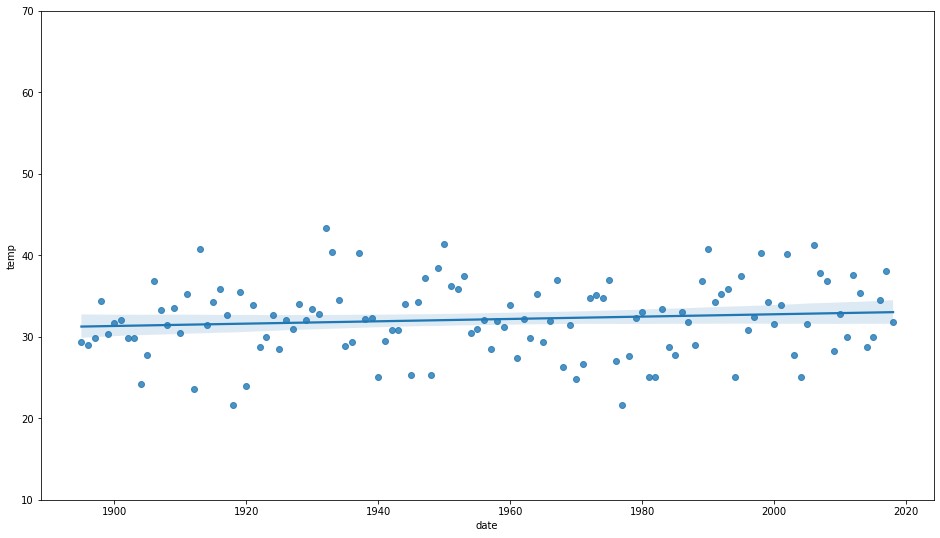

In [56]:
plt.figure(figsize=(16, 9))
sns.regplot(data=df, x="date", y="temp")
plt.gca().set_ylim(10, 70)
plt.show()

# Task 3, 4

In [57]:
lr = stats.linregress(x=df["date"].values, y=df["temp"].values)
print("Slope:", lr.slope, "\nIntercept:", lr.intercept)

Slope: 0.014360974519671084 
Intercept: 4.031789301970555


In [58]:
future_dates = np.arange(2019, 2023, 1, dtype=np.int32)
future_temps = future_dates * lr.slope + lr.intercept
pd.Series(future_temps, index=future_dates, name="Predicted Future Temperatures")

2019    33.03
2020    33.04
2021    33.06
2022    33.07
Name: Predicted Future Temperatures, dtype: float64

In [59]:
past_dates = np.arange(1980, 1985, 1, dtype=np.int32)
past_temps = past_dates * lr.slope + lr.intercept
pd.Series(past_temps, index=past_dates, name="Predicted Past Temperatures")

1980    32.47
1981    32.48
1982    32.50
1983    32.51
1984    32.52
Name: Predicted Past Temperatures, dtype: float64

# Task 7
Real vs Predicted

|date|temp|anomaly|
|---|---|---|
| 2021 | 34.8°F | 2.8°F |
| 2020 | 39.2°F | 7.2°F |
| 2019 | 32.6°F | 0.6°F |

Реальні значення за 2019 та 2021 роки дуже близькі до передбачених. Водночас реальне значення температури за 2020 рік перевищує передбачене на 18.64%. Значення 7.2°F колонки anomaly підтверджує аномальне походження виміру.

# The End